In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
path = 'C:/Users/Pippo/Desktop/python_SPICED/Projecto_Final/life_expectancy/'

df = pd.read_csv(path + 'UNdata_Life_Expectancy.csv')
df

Unnamed: 0      country       year    age   sex  age_w   sex_f  avg_year
0              0  Afghanistan  2095-2100  75.33  Male  80.04  Female    2097.5
1              1  Afghanistan  2090-2095  74.59  Male  79.42  Female    2092.5
2              2  Afghanistan  2085-2090  73.89  Male  78.80  Female    2087.5
3              3  Afghanistan  2080-2085  73.23  Male  78.17  Female    2082.5
4              4  Afghanistan  2075-2080  72.57  Male  77.52  Female    2077.5
5              5  Afghanistan  2070-2075  71.97  Male  76.87  Female    2072.5
6              6  Afghanistan  2065-2070  71.36  Male  76.18  Female    2067.5
7              7  Afghanistan  2060-2065  70.77  Male  75.47  Female    2062.5
8              8  Afghanistan  2055-2060  70.19  Male  74.72  Female    2057.5
9              9  Afghanistan  2050-2055  69.59  Male  73.88  Female    2052.5
10            10  Afghanistan  2045-2050  68.97  Male  73.05  Female    2047.5
11            11  Afghanistan  2040-2045  68.30  Male  72.15  Female    2042.5
12            12  Afghanistan  2035-2040  67.55  Male  71.15  Female    2037.5
13            13  Afghanistan  2030-2035  66.67  Male  70.06  Female    2032.5
14            14  Afghanistan  2025-2030  65.67  Male  68.82  Female    2027.5
15            15  Afghanistan  2020-2025  64.43  Male  67.36  Female    2022.5
16            16  Afghanistan  2015-2020  62.93  Male  65.62  Female    2017.5
17            17  Afghanistan  2010-2015  61.05  Male  63.52  Female    2012.5
18            18  Afghanistan  2005-2010  58.87  Male  61.27  Female    2007.5
19            19  Afghanistan  2000-2005  55.77  Male  58.11  Female    2002.5
20            20  Afghanistan  1995-2000  53.08  Male  55.33  Female    1997.5
21            21  Afghanistan  1990-1995  50.73  Male  52.82  Female    1992.5
22            22  Afghanistan  1985-1990  46.80  Male  48.67  Female    1987.5
23            23  Afghanistan  1980-1985  42.77  Male  44.42  Female    1982.5
24            24  Afghanistan  1975-1980  39.63  Male  41.25  Female    1977.5
25            25  Afghanistan  1970-1975  37.09  Male  38.68  Female    1972.5
26            26  Afghanistan  1965-1970  34.86  Male  36.42  Female    1967.5
27            27  Afghanistan  1960-1965  32.68  Male  34.25  Female    1962.5
28            28  Afghanistan  1955-1960  30.43  Male  31.96  Female    1957.5
29            29  Afghanistan  1950-1955  27.93  Male  29.43  Female    1952.5
...          ...          ...        ...    ...   ...    ...     ...       ...
7200        8160     Zimbabwe  2095-2100  77.51  Male  81.93  Female    2097.5
7201        8161     Zimbabwe  2090-2095  76.87  Male  81.31  Female    2092.5
7202        8162     Zimbabwe  2085-2090  76.22  Male  80.66  Female    2087.5
7203        8163     Zimbabwe  2080-2085  75.55  Male  79.99  Female    2082.5
7204        8164     Zimbabwe  2075-2080  74.86  Male  79.29  Female    2077.5
7205        8165     Zimbabwe  2070-2075  74.11  Male  78.44  Female    2072.5
7206        8166     Zimbabwe  2065-2070  73.21  Male  77.48  Female    2067.5
7207        8167     Zimbabwe  2060-2065  72.23  Male  76.48  Female    2062.5
7208        8168     Zimbabwe  2055-2060  71.19  Male  75.39  Female    2057.5
7209        8169     Zimbabwe  2050-2055  70.10  Male  74.22  Female    2052.5
7210        8170     Zimbabwe  2045-2050  68.82  Male  72.81  Female    2047.5
7211        8171     Zimbabwe  2040-2045  67.43  Male  71.18  Female    2042.5
7212        8172     Zimbabwe  2035-2040  66.03  Male  69.62  Female    2037.5
7213        8173     Zimbabwe  2030-2035  64.45  Male  67.95  Female    2032.5
7214        8174     Zimbabwe  2025-2030  62.69  Male  66.21  Female    2027.5
7215        8175     Zimbabwe  2020-2025  60.93  Male  64.59  Female    2022.5
7216        8176     Zimbabwe  2015-2020  59.91  Male  63.77  Female    2017.5
7217        8177     Zimbabwe  2010-2015  56.10  Male  59.02  Female    2012.5
7218        8178     Zimbabwe  2005-2010  47.20  Male  4

In [4]:
df.shape

(7230, 8)

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df

country       year    age   sex  age_w   sex_f  avg_year
0     Afghanistan  2095-2100  75.33  Male  80.04  Female    2097.5
1     Afghanistan  2090-2095  74.59  Male  79.42  Female    2092.5
2     Afghanistan  2085-2090  73.89  Male  78.80  Female    2087.5
3     Afghanistan  2080-2085  73.23  Male  78.17  Female    2082.5
4     Afghanistan  2075-2080  72.57  Male  77.52  Female    2077.5
5     Afghanistan  2070-2075  71.97  Male  76.87  Female    2072.5
6     Afghanistan  2065-2070  71.36  Male  76.18  Female    2067.5
7     Afghanistan  2060-2065  70.77  Male  75.47  Female    2062.5
8     Afghanistan  2055-2060  70.19  Male  74.72  Female    2057.5
9     Afghanistan  2050-2055  69.59  Male  73.88  Female    2052.5
10    Afghanistan  2045-2050  68.97  Male  73.05  Female    2047.5
11    Afghanistan  2040-2045  68.30  Male  72.15  Female    2042.5
12    Afghanistan  2035-2040  67.55  Male  71.15  Female    2037.5
13    Afghanistan  2030-2035  66.67  Male  70.06  Female    2032.5
14    Afghanistan  2025-2030  65.67  Male  68.82  Female    2027.5
15    Afghanistan  2020-2025  64.43  Male  67.36  Female    2022.5
16    Afghanistan  2015-2020  62.93  Male  65.62  Female    2017.5
17    Afghanistan  2010-2015  61.05  Male  63.52  Female    2012.5
18    Afghanistan  2005-2010  58.87  Male  61.27  Female    2007.5
19    Afghanistan  2000-2005  55.77  Male  58.11  Female    2002.5
20    Afghanistan  1995-2000  53.08  Male  55.33  Female    1997.5
21    Afghanistan  1990-1995  50.73  Male  52.82  Female    1992.5
22    Afghanistan  1985-1990  46.80  Male  48.67  Female    1987.5
23    Afghanistan  1980-1985  42.77  Male  44.42  Female    1982.5
24    Afghanistan  1975-1980  39.63  Male  41.25  Female    1977.5
25    Afghanistan  1970-1975  37.09  Male  38.68  Female    1972.5
26    Afghanistan  1965-1970  34.86  Male  36.42  Female    1967.5
27    Afghanistan  1960-1965  32.68  Male  34.25  Female    1962.5
28    Afghanistan  1955-1960  30.43  Male  31.96  Female    1957.5
29    Afghanistan  1950-1955  27.93  Male  29.43  Female    1952.5
...           ...        ...    ...   ...    ...     ...       ...
7200     Zimbabwe  2095-2100  77.51  Male  81.93  Female    2097.5
7201     Zimbabwe  2090-2095  76.87  Male  81.31  Female    2092.5
7202     Zimbabwe  2085-2090  76.22  Male  80.66  Female    2087.5
7203     Zimbabwe  2080-2085  75.55  Male  79.99  Female    2082.5
7204     Zimbabwe  2075-2080  74.86  Male  79.29  Female    2077.5
7205     Zimbabwe  2070-2075  74.11  Male  78.44  Female    2072.5
7206     Zimbabwe  2065-2070  73.21  Male  77.48  Female    2067.5
7207     Zimbabwe  2060-2065  72.23  Male  76.48  Female    2062.5
7208     Zimbabwe  2055-2060  71.19  Male  75.39  Female    2057.5
7209     Zimbabwe  2050-2055  70.10  Male  74.22  Female    2052.5
7210     Zimbabwe  2045-2050  68.82  Male  72.81  Female    2047.5
7211     Zimbabwe  2040-2045  67.43  Male  71.18  Female    2042.5
7212     Zimbabwe  2035-2040  66.03  Male  69.62  Female    2037.5
7213     Zimbabwe  2030-2035  64.45  Male  67.95  Female    2032.5
7214     Zimbabwe  2025-2030  62.69  Male  66.21  Female    2027.5
7215     Zimbabwe  2020-2025  60.93  Male  64.59  Female    2022.5
7216     Zimbabwe  2015-2020  59.91  Male  63.77  Female    2017.5
7217     Zimbabwe  2010-2015  56.10  Male  59.02  Female    2012.5
7218     Zimbabwe  2005-2010  47.20  Male  49.39  Female    2007.5
7219     Zimbabwe  2000-2005  42.70  Male  45.51  Female    2002.5
7220     Zimbabwe  1995-2000  45.06  Male  49.75  Female    1997.5
7221     Zimbabwe  1990-1995  51.67  Male  57.86  Female    1992.5
7222     Zimbabwe  1985-1990  57.48  Male  63.00  Female    1987.5
7223     Zimbabwe  1980-1985  58.59  Male  62.52  Female    1982.5
7224     Zimbabwe  1975-1980  56.10  Male  59.60  Female    1977.5
7225     Zimbabwe  1970-1975  54.09  Male  57.50  Female    1972.5
7226     Zimbabwe  1965-1970  52.50  Male  55.80  Female    1967.5
7227     Zimbabwe  1960-1965  50.90  Male  54.10  Female 

In [6]:
df.head()

country       year    age   sex  age_w   sex_f  avg_year
0  Afghanistan  2095-2100  75.33  Male  80.04  Female    2097.5
1  Afghanistan  2090-2095  74.59  Male  79.42  Female    2092.5
2  Afghanistan  2085-2090  73.89  Male  78.80  Female    2087.5
3  Afghanistan  2080-2085  73.23  Male  78.17  Female    2082.5
4  Afghanistan  2075-2080  72.57  Male  77.52  Female    2077.5

In [7]:
df.shape

(7230, 7)

# Example Germany Female and Male

In [8]:
df_Germany = df.loc[df['country'] == 'Germany']

In [9]:
df_Germany = df_Germany.reset_index(drop=True)
df_Germany

country       year    age   sex  age_w   sex_f  avg_year
0   Germany  2095-2100  89.92  Male  93.16  Female    2097.5
1   Germany  2090-2095  89.34  Male  92.58  Female    2092.5
2   Germany  2085-2090  88.79  Male  92.00  Female    2087.5
3   Germany  2080-2085  88.21  Male  91.42  Female    2082.5
4   Germany  2075-2080  87.64  Male  90.84  Female    2077.5
5   Germany  2070-2075  87.07  Male  90.26  Female    2072.5
6   Germany  2065-2070  86.49  Male  89.67  Female    2067.5
7   Germany  2060-2065  85.92  Male  89.09  Female    2062.5
8   Germany  2055-2060  85.34  Male  88.50  Female    2057.5
9   Germany  2050-2055  84.74  Male  87.90  Female    2052.5
10  Germany  2045-2050  84.13  Male  87.29  Female    2047.5
11  Germany  2040-2045  83.49  Male  86.69  Female    2042.5
12  Germany  2035-2040  82.81  Male  86.08  Female    2037.5
13  Germany  2030-2035  82.01  Male  85.48  Female    2032.5
14  Germany  2025-2030  81.04  Male  84.85  Female    2027.5
15  Germany  2020-2025  79.99  Male  84.22  Female    2022.5
16  Germany  2015-2020  78.96  Male  83.57  Female    2017.5
17  Germany  2010-2015  77.94  Male  82.91  Female    2012.5
18  Germany  2005-2010  76.99  Male  82.37  Female    2007.5
19  Germany  2000-2005  75.59  Male  81.46  Female    2002.5
20  Germany  1995-2000  74.02  Male  80.35  Female    1997.5
21  Germany  1990-1995  72.54  Male  79.12  Female    1992.5
22  Germany  1985-1990  71.59  Male  77.98  Female    1987.5
23  Germany  1980-1985  70.20  Male  76.68  Female    1982.5
24  Germany  1975-1980  68.89  Male  75.33  Female    1977.5
25  Germany  1970-1975  67.89  Male  74.07  Female    1972.5
26  Germany  1965-1970  67.61  Male  73.42  Female    1967.5
27  Germany  1960-1965  67.12  Male  72.56  Female    1962.5
28  Germany  1955-1960  66.30  Male  71.30  Female    1957.5
29  Germany  1950-1955  65.30  Male  69.60  Female    1952.5

In [10]:
df_Germany.dtypes

country      object
year         object
age         float64
sex          object
age_w       float64
sex_f        object
avg_year    float64
dtype: object

In [11]:
type(df)

pandas.core.frame.DataFrame

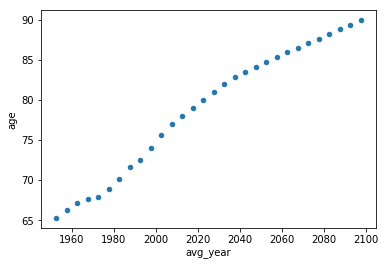

In [12]:
df_Germany.plot.scatter('avg_year', 'age')

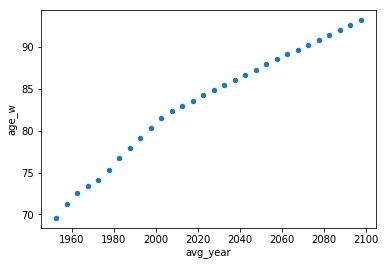

In [13]:
df_Germany.plot.scatter('avg_year', 'age_w')

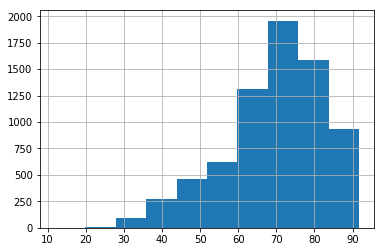

In [14]:
df['age'].hist(bins=10)

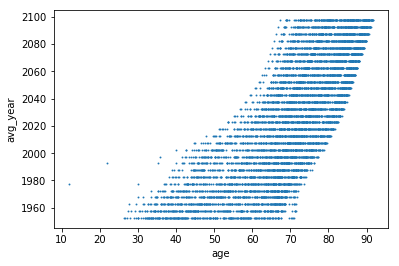

In [15]:
df.plot.scatter('age', 'avg_year', s=0.8)

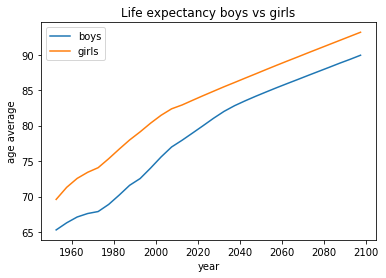

In [16]:
#plot unique boy/girl names over time

plt.plot(df_Germany['avg_year'], df_Germany['age'],label='boys')
plt.plot(df_Germany['avg_year'], df_Germany['age_w'],label='girls')
plt.legend()
plt.title('Life expectancy boys vs girls')
plt.ylabel('age average')
plt.xlabel('year')
plt.show()

# Linear Regression

In [17]:
x = df_Germany['avg_year'].values

In [18]:
y = df_Germany['age']
y_w = df_Germany['age_w']

In [19]:
X = df_Germany['avg_year'].values
y = df_Germany['age']

In [20]:
m = LinearRegression()
m

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
X.shape, y.shape

((30,), (30,))

In [22]:
X = np.array(X).reshape(-1, 1)

In [23]:
y = np.array(y)

In [24]:
X.shape, y.shape

((30, 1), (30,))

In [25]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
m.coef_

array([0.17997286])

In [27]:
m.intercept_

-285.5160389321467

In [28]:
ypred = m.predict(X)
ypred

array([91.97703226, 91.07716796, 90.17730367, 89.27743938, 88.37757508,
       87.47771079, 86.5778465 , 85.6779822 , 84.77811791, 83.87825362,
       82.97838932, 82.07852503, 81.17866073, 80.27879644, 79.37893215,
       78.47906785, 77.57920356, 76.67933927, 75.77947497, 74.87961068,
       73.97974638, 73.07988209, 72.1800178 , 71.2801535 , 70.38028921,
       69.48042492, 68.58056062, 67.68069633, 66.78083204, 65.88096774])

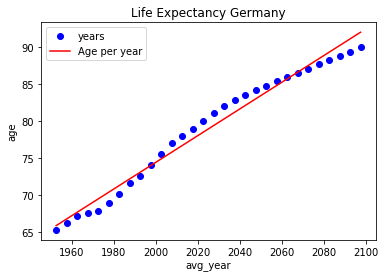

In [29]:
plt.figure()
plt.plot(X, y, 'bo', label='years')
plt.plot(X, ypred, 'r-', label ='Age per year')
plt.xlabel('avg_year')
plt.ylabel('age')
plt.legend()
plt.title('Life Expectancy Germany')
plt.show()

# Girls Linear Regression

In [ ]:
X = df_Germany['avg_year'].values
y_w = df_Germany['age_w']

In [ ]:
m_w = LinearRegression()
m_w

In [ ]:
X.shape, y_w.shape

In [ ]:
X = np.array(X).reshape(-1,1)

In [ ]:
y_w = np.array(y_w)

In [ ]:
X.shape, y_w.shape

In [ ]:
m_w.fit(X,y_w)

In [ ]:
m_w.coef_

In [ ]:
m_w.intercept_

In [ ]:
y_wpred = m_w.predict(X)
y_wpred

In [ ]:
plt.figure()
plt.plot(X, y_w, 'bo', label='Years')
plt.plot(X, y_wpred, 'r-', label ='Age per year')
plt.xlabel('avg_year')
plt.ylabel('age_w')
plt.legend()
plt.title('Life Expectancy Germany')
plt.show()

# CALCULATION

In [ ]:
current_year = time.localtime().tm_year

In [ ]:
def contact_1(name, gender, age, country, df):
    
    df_Germany = df.loc[df['country'] == country]    
    X = df_Germany['avg_year'].values
    X = np.array(X).reshape(-1,1)
    
    if gender == 'male':
        y = df_Germany['age'].values
        
    else:
        y = df_Germany['age_w'].values     
    
    m = LinearRegression()
    m.fit(X,y)
    p1 = ( age - current_year - m.intercept_) / (m.coef_[0] - 1)
    
    return p1

# PERSON 1

In [ ]:
name = input('What is your name? ')
gender = input('Gender M or W? ')
age = int(input('How old are you? '))
country = input('Where do you live? ')

person_1 = contact_1(name, gender, age, country, df)


# PERSON 2

In [ ]:
name_2 = input('What is her/his name? ')
gender = input('Gender M or W? ')
age = int(input('How old is she/he? '))
country = input('Where does he/she live? ')

person_2 = contact_1(name, gender, age, country, df)


In [ ]:
years_left = min([person_1, person_2]) - current_year
print(years_left)

# General Questions

In [ ]:
input('What is your relationship with ' + name_2 + ': ')
# choose option : Friends - Family - Couple

In [ ]:
# I need button options for week - months or year, where the user can choose time in days per:

# a week : 1 to 7 days
# a month : 1 to 30 days  
# a year: 1 to 60 days
times_seen_p1_p2 = int(input('How many times do ' + name_2 + ' and you see each other? '))


In [ ]:
hours_p1_p2 = int(input('Each time you see ' + name_2 + ', how many hours do you spend together? '))
# from 1 to 24 hours? 


In [ ]:
time_left = (hours_p1_p2 * 0.000114155) * times_seen_p1_p2 * years_left * 365
print(time_left)

In [ ]:
# this is the time left in days.
days = int(time_left)
days

In [ ]:
# This is the float translated in hours!!
hours = round((time_left - days) * 24, 1)  
hours

In [ ]:
print(name + ', if you carry on seeing ' + name_2 + ' with the same frequency as you have done so far, this is the time you have left to spend together.')

In [ ]:
print('According to your data left time is', days, 'days and', hours, 'hours')

In [ ]:
"""

####################################################
# should be below the first general question

# This could be to gather more indformation and DATA
input('Do you go on Holiday together?')
# Yes - NO 

# IF YES : 
input('How long do you go for?')

"""